In [1064]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [1065]:
df = pd.read_csv('car details v4.csv')

In [1066]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [1067]:
df.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [1068]:
print(df.isnull().sum())
df.shape

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64


(2059, 20)

In [1069]:
new_df = df.dropna(axis=0)
print(new_df.isnull().sum())
new_df.shape

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64


(1874, 20)

In [1070]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1874 entries, 0 to 2057
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1874 non-null   object 
 1   Model               1874 non-null   object 
 2   Price               1874 non-null   int64  
 3   Year                1874 non-null   int64  
 4   Kilometer           1874 non-null   int64  
 5   Fuel Type           1874 non-null   object 
 6   Transmission        1874 non-null   object 
 7   Location            1874 non-null   object 
 8   Color               1874 non-null   object 
 9   Owner               1874 non-null   object 
 10  Seller Type         1874 non-null   object 
 11  Engine              1874 non-null   object 
 12  Max Power           1874 non-null   object 
 13  Max Torque          1874 non-null   object 
 14  Drivetrain          1874 non-null   object 
 15  Length              1874 non-null   float64
 16  Width      

In [1071]:
new_df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [1072]:
def conv_number(s:str): #(s:str) is a type hint which tells us that the function expects a string as input
    num = ""
    for i in list(s):
        if(i.isdigit()):
            num += i
    return eval(num) #lets us evaluate the string as a number

new_df['Engine'] = new_df['Engine'].apply(conv_number)
new_df.head()


/tmp/ipykernel_41476/1181819248.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Engine'] = new_df['Engine'].apply(conv_number)


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [1073]:
final_df = new_df.drop(['Make', 'Model', 'Seller Type', 'Transmission', 'Location', 'Owner', 'Color', 'Drivetrain', 'Max Power', 'Max Torque'], axis=1)

In [1074]:
final_df.head()
final_df_test = final_df.drop(['Fuel Type'], axis=1)

<Axes: >

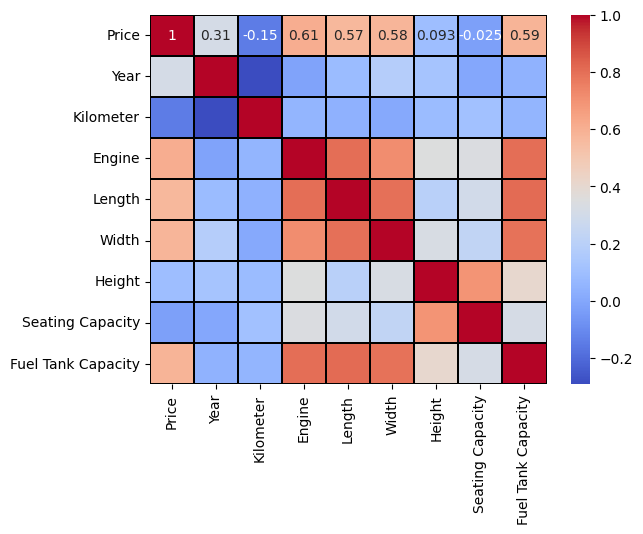

In [1075]:
sns.heatmap(final_df_test.corr(), annot=True, cmap='coolwarm', linewidths=0.1, linecolor='black')

In [1076]:
new_df[['bhp', 'rpm power']] = new_df['Max Power'].str.split('@', expand=True)
new_df['bhp'] = new_df['bhp'].str.replace(' bhp', '').str.strip()
new_df['rpm power'] = new_df['rpm power'].str.replace(' rpm', '').str.strip()

new_df[['Nm', 'rpm torque']] = new_df['Max Torque'].str.split('@', expand=True)
new_df['Nm'] = new_df['Nm'].str.replace(' Nm', '').str.strip()
new_df['rpm torque'] = new_df['rpm torque'].str.replace(' rpm', '').str.strip()

new_df['bhp'].replace('', np.nan, inplace=True)
new_df['rpm power'].replace('', np.nan, inplace=True)
new_df['Nm'].replace('', np.nan, inplace=True)
new_df['rpm torque'].replace('', np.nan, inplace=True)

/tmp/ipykernel_41476/2325282546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[['bhp', 'rpm power']] = new_df['Max Power'].str.split('@', expand=True)
/tmp/ipykernel_41476/2325282546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[['bhp', 'rpm power']] = new_df['Max Power'].str.split('@', expand=True)
/tmp/ipykernel_41476/2325282546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [1077]:
new_df.isnull().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
bhp                   0
rpm power             2
Nm                    0
rpm torque            0
dtype: int64

In [1078]:
new_df = new_df.drop(['Max Power', 'Max Torque'], axis=1)
new_df.sample(5)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,bhp,rpm power,Nm,rpm torque
1797,Maruti Suzuki,Celerio VXi (O) [2019-2020],509999,2019,48000,Petrol,Manual,Hyderabad,White,First,...,FWD,3695.0,1600.0,1560.0,5.0,35.0,67,6000,90,3500
1103,Toyota,Fortuner 3.0 4x2 MT,1225000,2012,97000,Diesel,Manual,Jalandhar,White,Second,...,RWD,4705.0,1840.0,1850.0,7.0,80.0,169,3600,343,1400
374,Honda,Jazz SV Petrol,495000,2015,52000,Petrol,Manual,Noida,Brown,First,...,FWD,3955.0,1694.0,1544.0,5.0,40.0,89,6000,110,4800
320,Hyundai,Venue SX 1.5 CRDi,1097000,2022,1700,Diesel,Manual,Mumbai,White,First,...,FWD,3995.0,1770.0,1605.0,5.0,45.0,99,4000,240,1500
805,Maruti Suzuki,Vitara Brezza VDi (O) [2016-2018],825000,2019,25500,Diesel,Manual,Lucknow,Silver,First,...,FWD,3995.0,1790.0,1640.0,5.0,48.0,89,4000,200,1750


In [1079]:
year_mapping = {year: index for index, year in enumerate(sorted(new_df['Year'].unique()))} #enumerate will give index, year in a sorted ascending order of unique years of which we will take the indices
new_df['Year'] = new_df['Year'].map(year_mapping)

In [1080]:
new_df.sample(2)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,bhp,rpm power,Nm,rpm torque
1749,BMW,X3 xDrive30i M Sport,6680000,17,18223,Petrol,Automatic,Ahmedabad,Blue,First,...,AWD,4708.0,1891.0,1676.0,5.0,60.0,248,5200,350,1450
464,Porsche,718 Cayman [2017-2020],9000000,12,7000,Petrol,Automatic,Faridabad,Red,First,...,RWD,4379.0,1801.0,1295.0,2.0,54.0,295,6500,380,1950


In [1081]:
new_df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,bhp,rpm power,Nm,rpm torque
0,Honda,Amaze 1.2 VX i-VTEC,505000,12,87150,Petrol,Manual,Pune,Grey,First,...,FWD,3990.0,1680.0,1505.0,5.0,35.0,87,6000,109,4500
1,Maruti Suzuki,Swift DZire VDI,450000,9,75000,Diesel,Manual,Ludhiana,White,Second,...,FWD,3995.0,1695.0,1555.0,5.0,42.0,74,4000,190,2000
2,Hyundai,i10 Magna 1.2 Kappa2,220000,6,67000,Petrol,Manual,Lucknow,Maroon,First,...,FWD,3585.0,1595.0,1550.0,5.0,35.0,79,6000,112.7619,4000
3,Toyota,Glanza G,799000,14,37500,Petrol,Manual,Mangalore,Red,First,...,FWD,3995.0,1745.0,1510.0,5.0,37.0,82,6000,113,4200
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,13,69000,Diesel,Manual,Mumbai,Grey,First,...,RWD,4735.0,1830.0,1795.0,7.0,55.0,148,3400,343,1400


In [1082]:
df = new_df 
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,bhp,rpm power,Nm,rpm torque
0,Honda,Amaze 1.2 VX i-VTEC,505000,12,87150,Petrol,Manual,Pune,Grey,First,...,FWD,3990.0,1680.0,1505.0,5.0,35.0,87,6000,109,4500
1,Maruti Suzuki,Swift DZire VDI,450000,9,75000,Diesel,Manual,Ludhiana,White,Second,...,FWD,3995.0,1695.0,1555.0,5.0,42.0,74,4000,190,2000
2,Hyundai,i10 Magna 1.2 Kappa2,220000,6,67000,Petrol,Manual,Lucknow,Maroon,First,...,FWD,3585.0,1595.0,1550.0,5.0,35.0,79,6000,112.7619,4000
3,Toyota,Glanza G,799000,14,37500,Petrol,Manual,Mangalore,Red,First,...,FWD,3995.0,1745.0,1510.0,5.0,37.0,82,6000,113,4200
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,13,69000,Diesel,Manual,Mumbai,Grey,First,...,RWD,4735.0,1830.0,1795.0,7.0,55.0,148,3400,343,1400


In [1084]:
# df = df.dropna()

# norm1 = ['Price']
# scaled_columns = ['Kilometer', 'Engine', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'bhp', 'rpm power', 'Nm', 'rpm torque']
# scaler = StandardScaler()
# df[scaled_columns] = scaler.fit_transform(df[scaled_columns])
# df[norm1] = scaler.fit_transform(df[norm1])

df = df.dropna()

norm1 = ['Price']
scaled_columns = ['Kilometer', 'Engine', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'bhp', 'rpm power', 'Nm', 'rpm torque']
scaler = MinMaxScaler()
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])
df[norm1] = scaler.fit_transform(df[norm1])


In [1085]:
df.info()
df.drop(['Location', 'Color', 'Seller Type', 'Drivetrain', 'Make', 'Model', 'Owner'], axis=1, inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 1872 entries, 0 to 2057
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1872 non-null   object 
 1   Model               1872 non-null   object 
 2   Price               1872 non-null   float64
 3   Year                1872 non-null   int64  
 4   Kilometer           1872 non-null   float64
 5   Fuel Type           1872 non-null   object 
 6   Transmission        1872 non-null   object 
 7   Location            1872 non-null   object 
 8   Color               1872 non-null   object 
 9   Owner               1872 non-null   object 
 10  Seller Type         1872 non-null   object 
 11  Engine              1872 non-null   float64
 12  Drivetrain          1872 non-null   object 
 13  Length              1872 non-null   float64
 14  Width               1872 non-null   float64
 15  Height              1872 non-null   float64
 16  Seating Cap

In [1086]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1872 entries, 0 to 2057
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               1872 non-null   float64
 1   Year                1872 non-null   int64  
 2   Kilometer           1872 non-null   float64
 3   Fuel Type           1872 non-null   object 
 4   Transmission        1872 non-null   object 
 5   Engine              1872 non-null   float64
 6   Length              1872 non-null   float64
 7   Width               1872 non-null   float64
 8   Height              1872 non-null   float64
 9   Seating Capacity    1872 non-null   float64
 10  Fuel Tank Capacity  1872 non-null   float64
 11  bhp                 1872 non-null   float64
 12  rpm power           1872 non-null   float64
 13  Nm                  1872 non-null   float64
 14  rpm torque          1872 non-null   float64
dtypes: float64(12), int64(1), object(2)
memory usage: 234.0+ KB


In [1087]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X_train = ohe.fit_transform(df[['Fuel Type', 'Transmission']]).toarray()

In [1088]:
print(X_train.shape)

# Check the number of feature names
print(len(ohe.get_feature_names_out()))

(1872, 9)
9


In [1089]:
X_train_df = pd.DataFrame(X_train, columns=ohe.get_feature_names_out())

In [1090]:
test_df = pd.concat([df, X_train_df], axis=1)

In [1091]:
# cols = ['Fuel Type', 'Transmission']

# dummied = pd.get_dummies(data=df, columns=cols, drop_first=True, dtype=int)
# df = pd.concat([df, dummied], axis=1)
# df = df.drop(cols, axis=1)

In [1092]:
df.sample(5)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1872 entries, 0 to 2057
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               1872 non-null   float64
 1   Year                1872 non-null   int64  
 2   Kilometer           1872 non-null   float64
 3   Fuel Type           1872 non-null   object 
 4   Transmission        1872 non-null   object 
 5   Engine              1872 non-null   float64
 6   Length              1872 non-null   float64
 7   Width               1872 non-null   float64
 8   Height              1872 non-null   float64
 9   Seating Capacity    1872 non-null   float64
 10  Fuel Tank Capacity  1872 non-null   float64
 11  bhp                 1872 non-null   float64
 12  rpm power           1872 non-null   float64
 13  Nm                  1872 non-null   float64
 14  rpm torque          1872 non-null   float64
dtypes: float64(12), int64(1), object(2)
memory usage: 298.5+ KB


In [1093]:
y = df['Price']
X = df.drop(['Transmission', 'Fuel Type'], axis=1)

In [1094]:
X.isnull().sum()

Price                 0
Year                  0
Kilometer             0
Engine                0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
bhp                   0
rpm power             0
Nm                    0
rpm torque            0
dtype: int64

<Axes: >

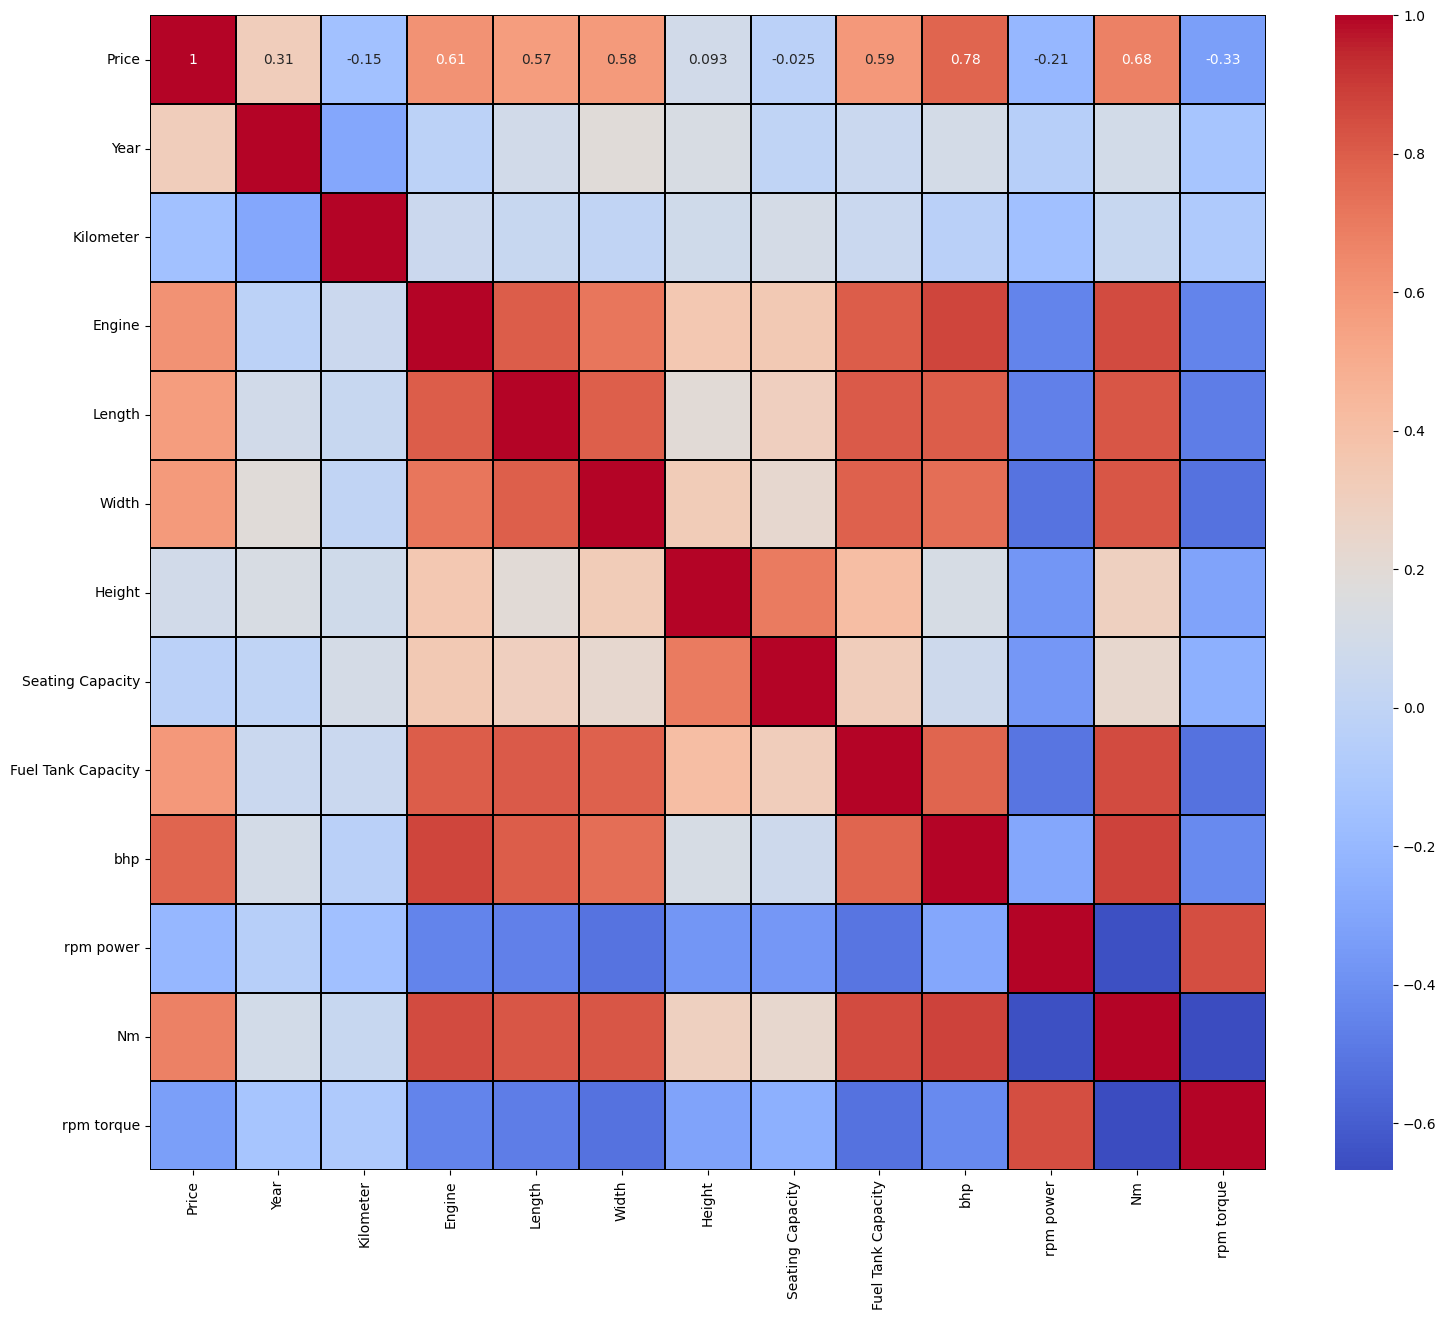

In [1095]:
plt.figure(figsize=(18, 15))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', linewidths=0.1, linecolor='black')

In [1096]:
X_check = test_df.drop(['Transmission', 'Fuel Type'], axis=1)

<Axes: title={'center': 'Correlation with Price'}>

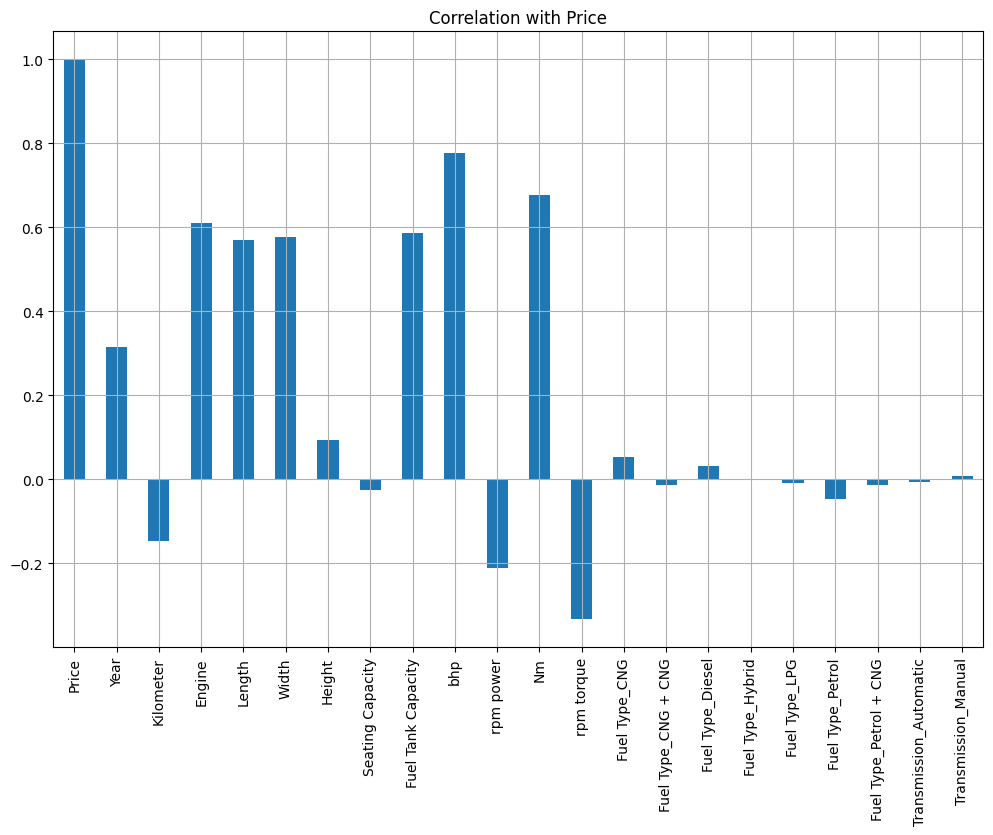

In [1097]:
X_check.corrwith(y).plot(kind='bar', grid=True, figsize=(12, 8), title="Correlation with Price")

<Axes: >

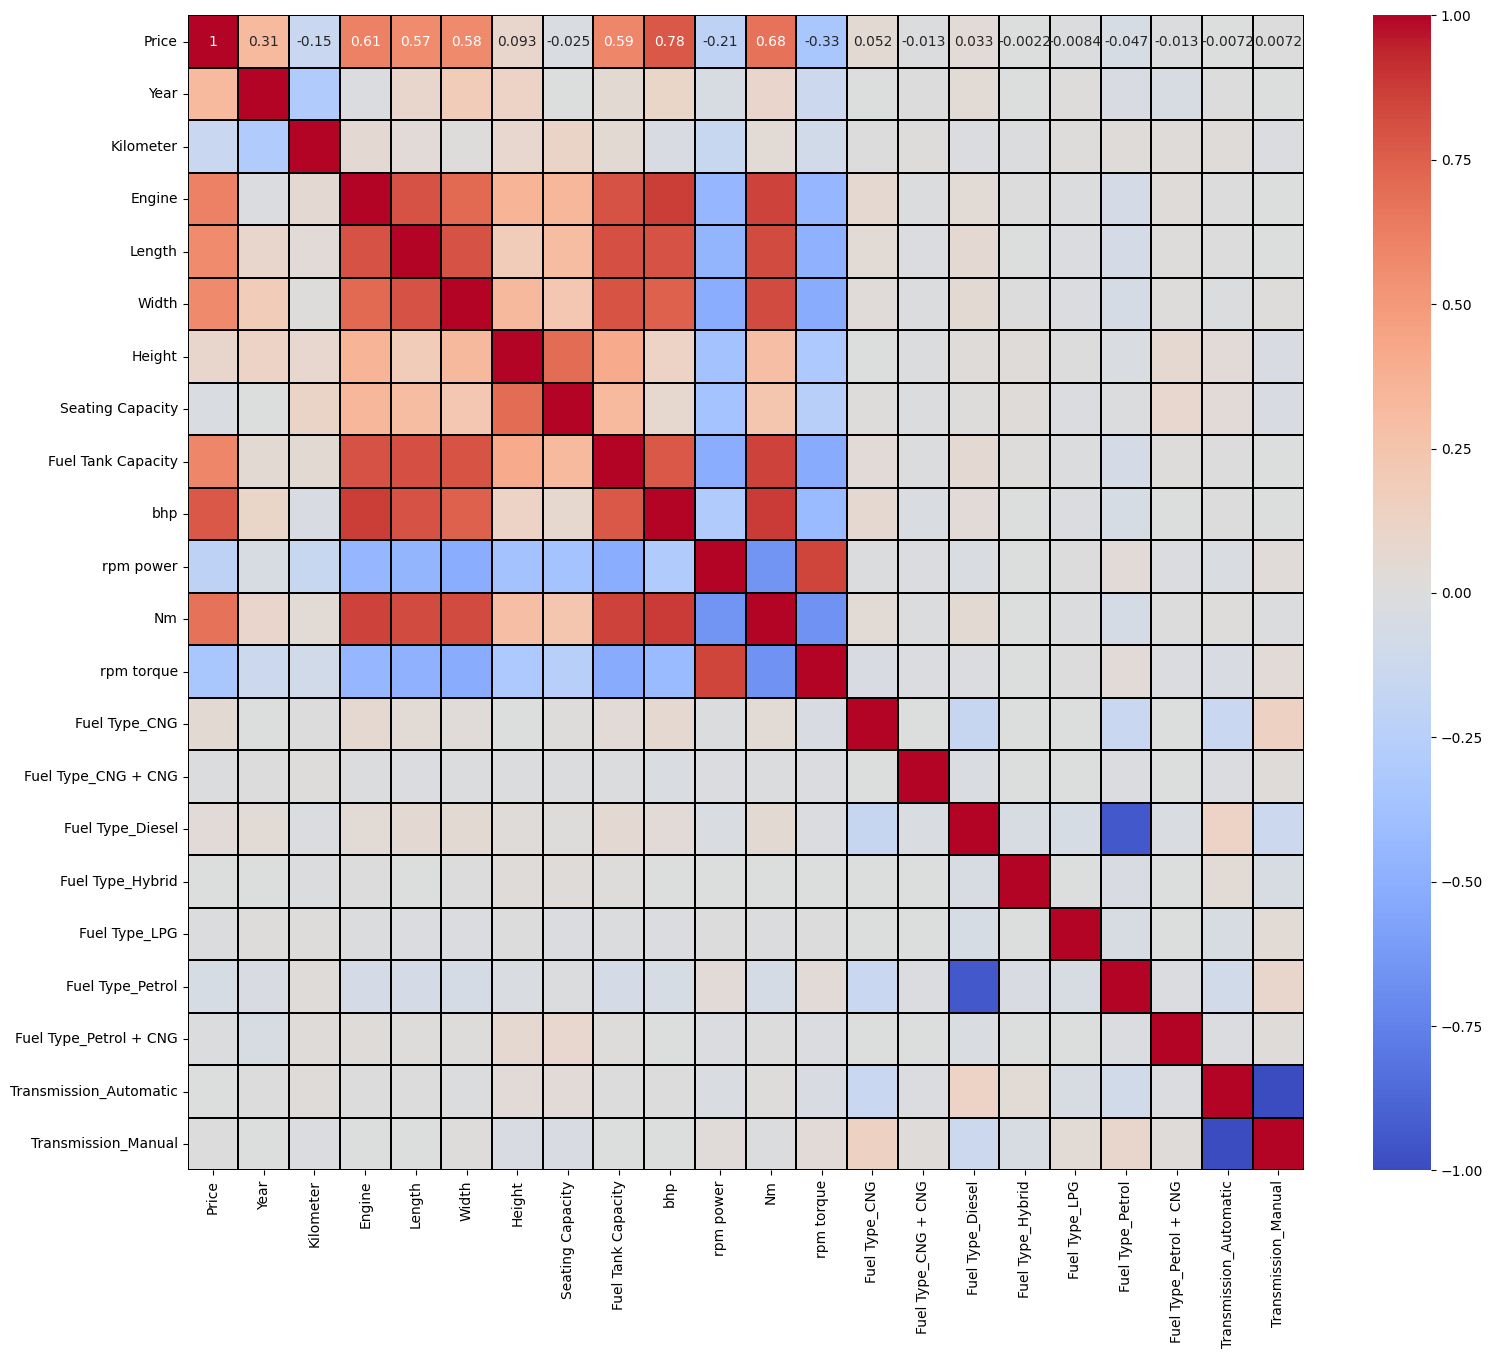

In [1098]:
plt.figure(figsize=(18, 15))
sns.heatmap(X_check.corr(), annot=True, cmap='coolwarm', linewidths=0.1, linecolor='black')

In [1099]:
X.drop(['Price'], axis=1, inplace=True)

In [1100]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1872 entries, 0 to 2057
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                1872 non-null   int64  
 1   Kilometer           1872 non-null   float64
 2   Engine              1872 non-null   float64
 3   Length              1872 non-null   float64
 4   Width               1872 non-null   float64
 5   Height              1872 non-null   float64
 6   Seating Capacity    1872 non-null   float64
 7   Fuel Tank Capacity  1872 non-null   float64
 8   bhp                 1872 non-null   float64
 9   rpm power           1872 non-null   float64
 10  Nm                  1872 non-null   float64
 11  rpm torque          1872 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 254.7 KB


In [1101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [1102]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1497, 12), (375, 12), (1497,), (375,))

In [1103]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, max_error, mean_absolute_error, root_mean_squared_error
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
maxi_error = max_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"rmse : {rmse}")
print(f"r2_score : {r2}")
print(f"max_error : {maxi_error}")
print(f"mean_squared_error : {mse}")

rmse : 0.02393377735720137
r2_score : 0.8170908579930295
max_error : 0.17616745792100186
mean_squared_error : 0.0005728256985840849


In [1104]:
X.head()

,Year,Kilometer,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,bhp,rpm power,Nm,rpm torque
0,12,0.043575,0.096180,0.360729,0.275168,0.373402,0.500000,0.222222,0.0832,0.578652,0.083333,0.798165
1,9,0.037500,0.104558,0.362753,0.295302,0.437340,0.500000,0.300000,0.0624,0.204120,0.193989,0.339450
2,6,0.033500,0.096012,0.196761,0.161074,0.430946,0.500000,0.222222,0.0704,0.578652,0.088473,0.706422
3,14,0.018750,0.096012,0.362753,0.362416,0.379795,0.500000,0.244444,0.0752,0.578652,0.088798,0.743119
4,13,0.034500,0.296414,0.662348,0.476510,0.744246,0.833333,0.444444,0.1808,0.091760,0.403005,0.229358


In [1105]:
#we can use scaler.inverse_transform to get the original values of the price
print(y_pred)

[-3.67809480e-03  1.34885737e-01  6.86567864e-02  1.61184018e-02
  1.25603678e-02  3.56542732e-03  5.49070141e-02  7.64835407e-03
  3.25766697e-02  4.65908401e-02  1.81929612e-01  5.50014072e-03
  1.72353405e-03  7.92246289e-02  1.81036393e-03 -3.84853790e-04
  1.11069310e-02  9.89980290e-02  1.08926695e-01  4.64451511e-03
  1.76638170e-01 -5.81644542e-03  5.31447494e-02  1.00548374e-01
  4.05591388e-02  1.41070501e-02  1.47070579e-02  6.86637957e-02
  2.42845786e-02  1.02210718e-01  1.17639428e-01 -6.17860081e-04
 -3.48455707e-02  6.48102786e-02  1.25088671e-01  4.28091114e-02
  1.55664778e-02  6.63208813e-03  1.39456071e-01  6.60887333e-03
  3.74638170e-02  2.14470105e-02  6.89922887e-02 -4.20122672e-03
 -1.50235688e-02  4.79457210e-02  6.54061908e-02  3.00571955e-02
  3.06944775e-02  7.69447798e-03  1.60270399e-02  2.72617568e-02
  1.37189978e-01  1.15748659e-01  3.87858024e-02 -1.48483032e-02
 -1.33469146e-02  1.28770886e-02  1.05457884e-02 -3.67203902e-02
  7.46196097e-02 -1.21207

In [1106]:
print(y_test)

1588    0.012904
1972    0.163829
2015    0.045521
1480    0.014620
1076    0.015622
          ...   
1503    0.019341
353     0.015479
1559    0.032646
1343    0.010186
159     0.012618
Name: Price, Length: 375, dtype: float64
